## Introduction to Dynamic Programming

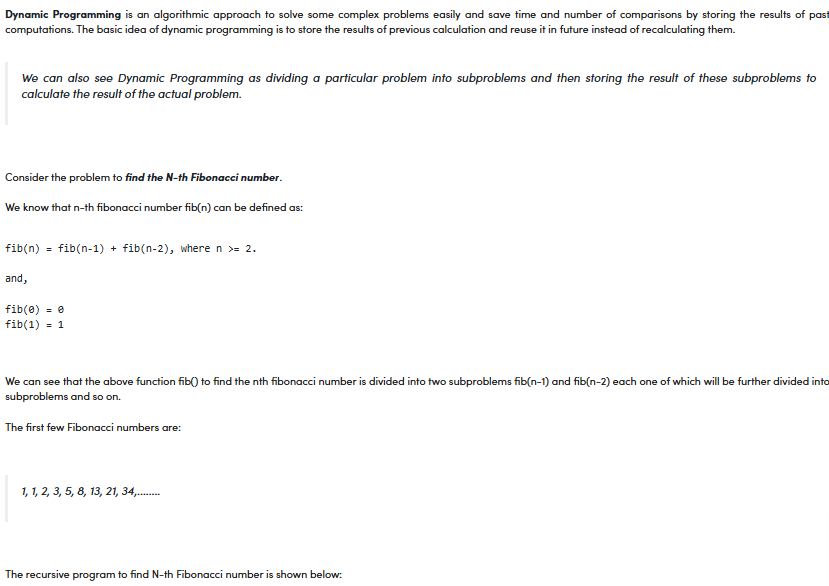

In [1]:
# Fibonacci series using recursion
def fibonacci(n):
	if n <= 1:
		return n
	return fibonacci(n-1) + fibonacci(n-2)


if __name__ == "__main__":
	n = 9
	print(fibonacci(n))

34


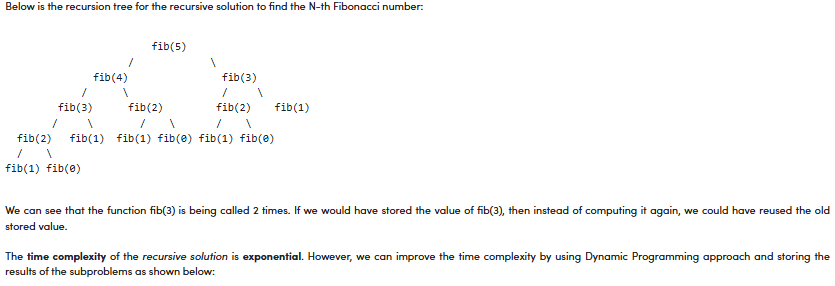

In [2]:
# Fibonacci Series using Dynamic Programming
def fibonacci(n):

	# Taking 1st two fibonacci numbers as 0 and 1
	f = [0, 1]


	for i in range(2, n+1):
		f.append(f[i-1] + f[i-2])
	return f[n]

print(fibonacci(9))

34


# Tabulation vs Memoization

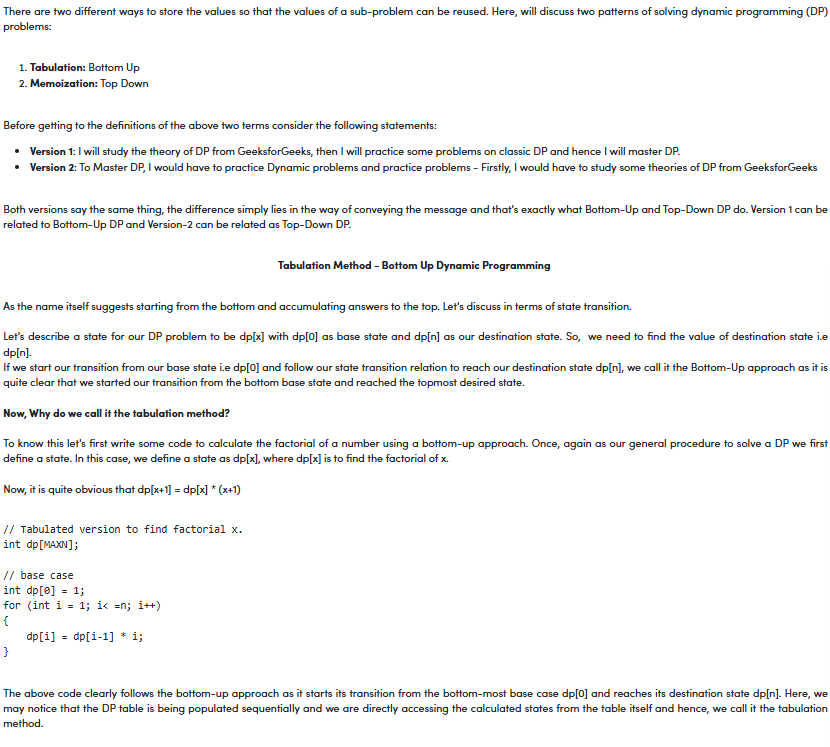

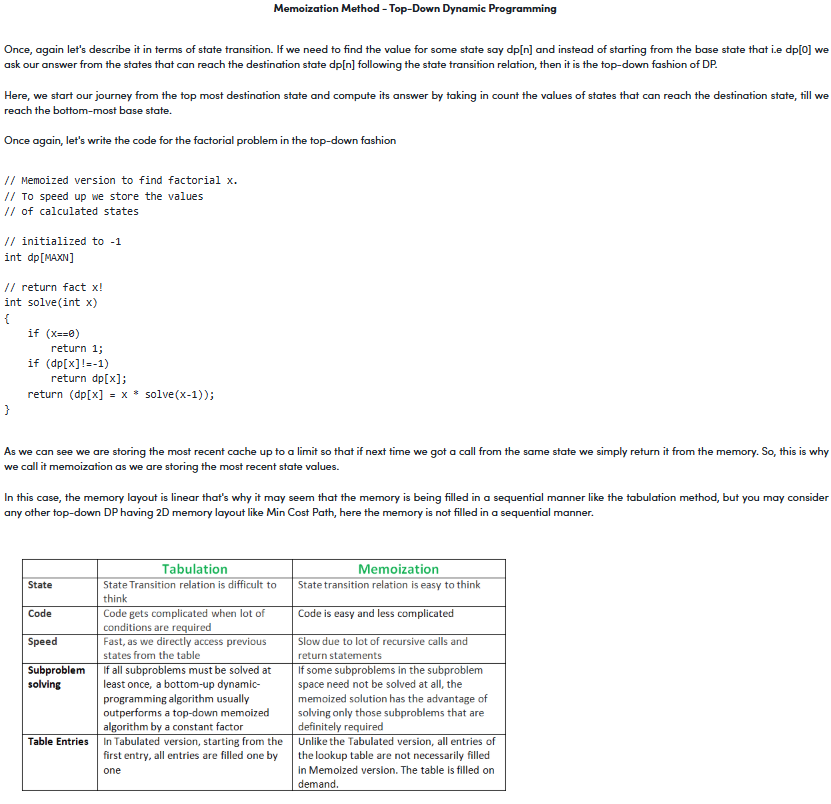

# Longest Common Subsequence

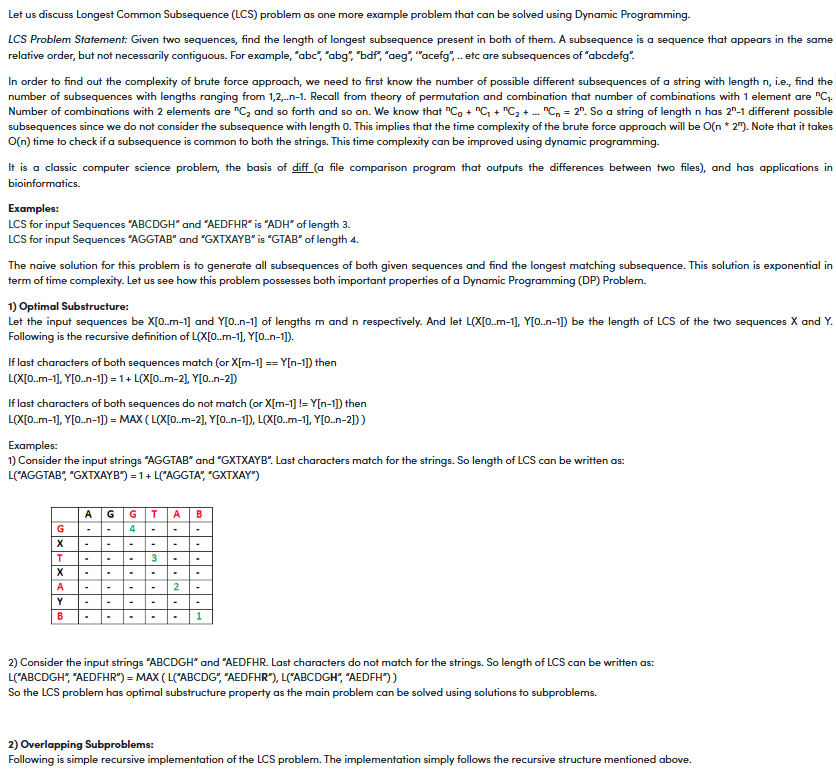


In [3]:
# A Naive recursive Python implementation of LCS problem

def lcs(X, Y, m, n):

	if m == 0 or n == 0:
		return 0
	elif X[m-1] == Y[n-1]:
		return 1 + lcs(X, Y, m-1, n-1);
	else:
		return max(lcs(X, Y, m, n-1), lcs(X, Y, m-1, n));


# Driver program to test the above function
X = "AGGTAB"
Y = "GXTXAYB"
print ("Length of LCS is ", lcs(X , Y, len(X), len(Y)) )

Length of LCS is  4


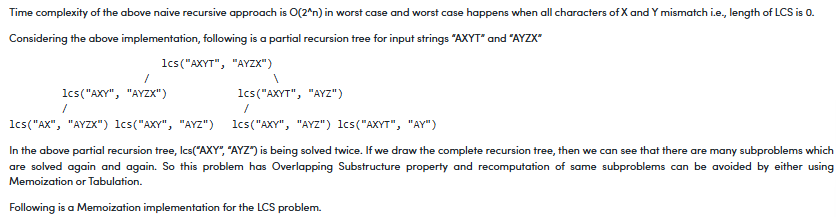

In [4]:
# A Top-Down DP implementation of LCS problem

# Returns length of LCS for X[0..m-1], Y[0..n-1]
def lcs(X, Y, m, n, dp):

	if (m == 0 or n == 0):
		return 0

	if (dp[m][n] != -1):
		return dp[m][n]

	if X[m - 1] == Y[n - 1]:
		dp[m][n] = 1 + lcs(X, Y, m - 1, n - 1, dp)
		return dp[m][n]

	dp[m][n] = max(lcs(X, Y, m, n - 1, dp),lcs(X, Y, m - 1, n, dp))
	return dp[m][n]

# Driver code

X = "AGGTAB"
Y = "GXTXAYB"

m = len(X)
n = len(Y)
dp = [[-1 for i in range(n + 1)]for j in range(m + 1)]

print(f"Length of LCS is {lcs(X, Y, m, n, dp)}")

Length of LCS is 4


**Time Complexity : O(mn)** ignoring recursion stack space

Following is a tabulated implementation for the LCS problem.

In [5]:
# Dynamic Programming implementation of LCS problem

def lcs(X , Y):
	# find the length of the strings
	m = len(X)
	n = len(Y)

	# declaring the array for storing the dp values
	L = [[None]*(n+1) for i in range(m+1)]

	"""Following steps build L[m+1][n+1] in bottom up fashion
	Note: L[i][j] contains length of LCS of X[0..i-1]
	and Y[0..j-1]"""
	for i in range(m+1):
		for j in range(n+1):
			if i == 0 or j == 0 :
				L[i][j] = 0
			elif X[i-1] == Y[j-1]:
				L[i][j] = L[i-1][j-1]+1
			else:
				L[i][j] = max(L[i-1][j] , L[i][j-1])

	# L[m][n] contains the length of LCS of X[0..n-1] & Y[0..m-1]
	return L[m][n]
#end of function lcs


# Driver program to test the above function
X = "AGGTAB"
Y = "GXTXAYB"
print ("Length of LCS is ", lcs(X, Y) )

Length of LCS is  4


**Time Complexity of the above implementation is O(mn) which is much better than the worst-case time complexity of Naive Recursive implementation.**

The above algorithm/code returns only length of LCS.

# Coin Change Problem

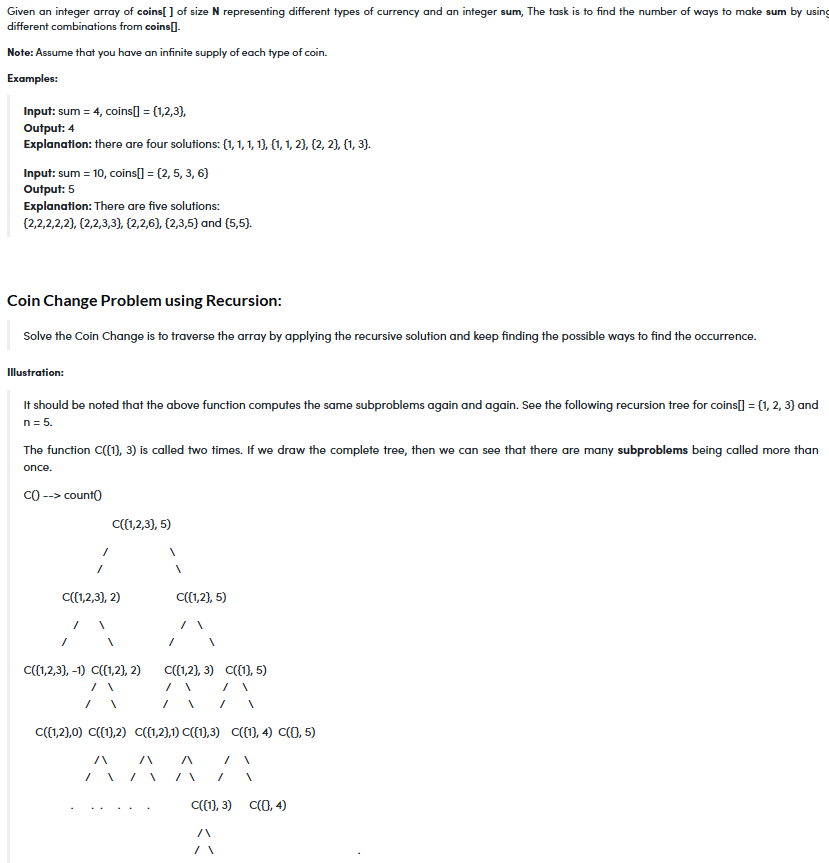

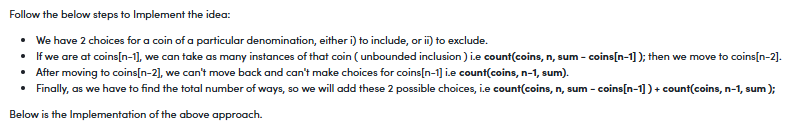

In [6]:
# Recursive Python3 program for
# coin change problem.

# Returns the count of ways we can sum
# coins[0...n-1] coins to get sum "sum"


def count(coins, n, sum):

    # If sum is 0 then there is 1
    # solution (do not include any coin)
    if (sum == 0):
        return 1

    # If sum is less than 0 then no
    # solution exists
    if (sum < 0):
        return 0

    # If there are no coins and sum
    # is greater than 0, then no
    # solution exist
    if (n <= 0):
        return 0

    # count is sum of solutions (i)
    # including coins[n-1] (ii) excluding coins[n-1]
    return count(coins, n - 1, sum) + count(coins, n, sum-coins[n-1])


# Driver program to test above function
coins = [1, 2, 3]
n = len(coins)
print(count(coins, n, 4))

4


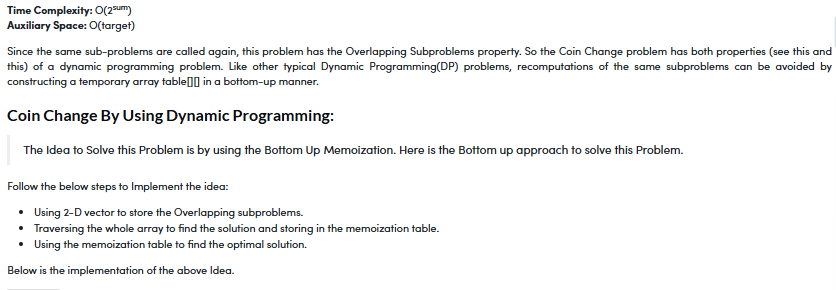

In [7]:
# Dynamic Programming Python implementation of Coin
# Change problem


def count(coins, n, sum):
    # We need sum+1 rows as the table is constructed
    # in bottom up manner using the base case 0 value
    # case (sum = 0)
    table = [[0 for x in range(n)] for x in range(sum+1)]

    # Fill the entries for 0 value case (n = 0)
    for i in range(n):
        table[0][i] = 1

    # Fill rest of the table entries in bottom up manner
    for i in range(1, sum+1):
        for j in range(n):

            # Count of solutions including coins[j]
            x = table[i - coins[j]][j] if i-coins[j] >= 0 else 0

            # Count of solutions excluding coins[j]
            y = table[i][j-1] if j >= 1 else 0

            # total count
            table[i][j] = x + y

    return table[sum][n-1]


# Driver program to test above function
if __name__ == '__main__':
    coins = [1, 2, 3]
    n = len(coins)
    sum = 4
    print(count(coins, n, sum))

4


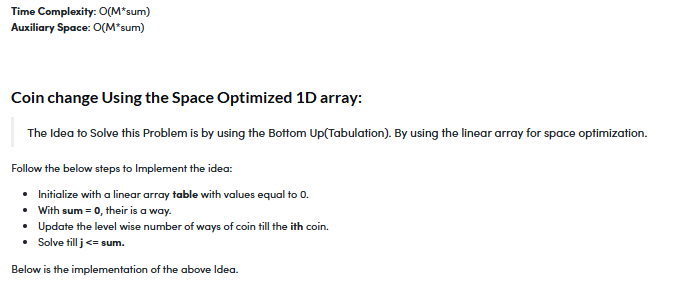

In [8]:
# Dynamic Programming Python implementation of Coin
# Change problem


def count(coins, n, sum):

    # table[i] will be storing the number of solutions for
    # value i. We need sum+1 rows as the table is constructed
    # in bottom up manner using the base case (sum = 0)
    # Initialize all table values as 0
    table = [0 for k in range(sum+1)]

    # Base case (If given value is 0)
    table[0] = 1

    # Pick all coins one by one and update the table[] values
    # after the index greater than or equal to the value of the
    # picked coin
    for i in range(0, n):
        for j in range(coins[i], sum+1):
            table[j] += table[j-coins[i]]

    return table[sum]


# Driver program to test above function
coins = [1, 2, 3]
n = len(coins)
sum = 4
x = count(coins, n, sum)
print(x)

4


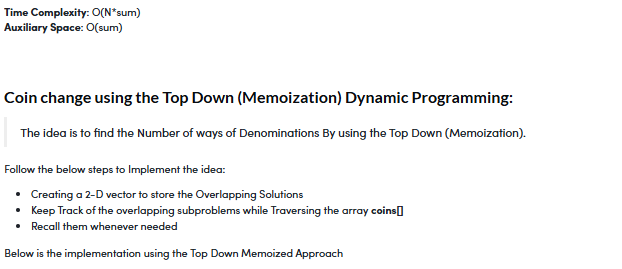

In [9]:
# Python program for the above approach
def coinchange(a, v, n, dp):
    if (v == 0):
        dp[n][v] = 1
        return dp[n][v]
    if (n == 0):
        return 0
    if (dp[n][v] != -1):
        return dp[n][v]
    if (a[n - 1] <= v):

        # Either Pick this coin or not
        dp[n][v] = coinchange(a, v - a[n - 1], n, dp) + \
            coinchange(a, v, n - 1, dp)
        return dp[n][v]
    else:  # We have no option but to leave this coin
        dp[n][v] = coinchange(a, v, n - 1, dp)
        return dp[n][v]


# Driver code
if __name__ == '__main__':
    tc = 1
    while (tc != 0):
        n = 3
        v = 4
        a = [1, 2, 3]
        dp = [[-1 for i in range(v+1)] for j in range(n+1)]
        res = coinchange(a, v, n, dp)
        print(res)
        tc -= 1


4


**Time Complexity:** O(N*sum)

**Auxiliary Space:** O(N*sum)

# Edit Distance Problem

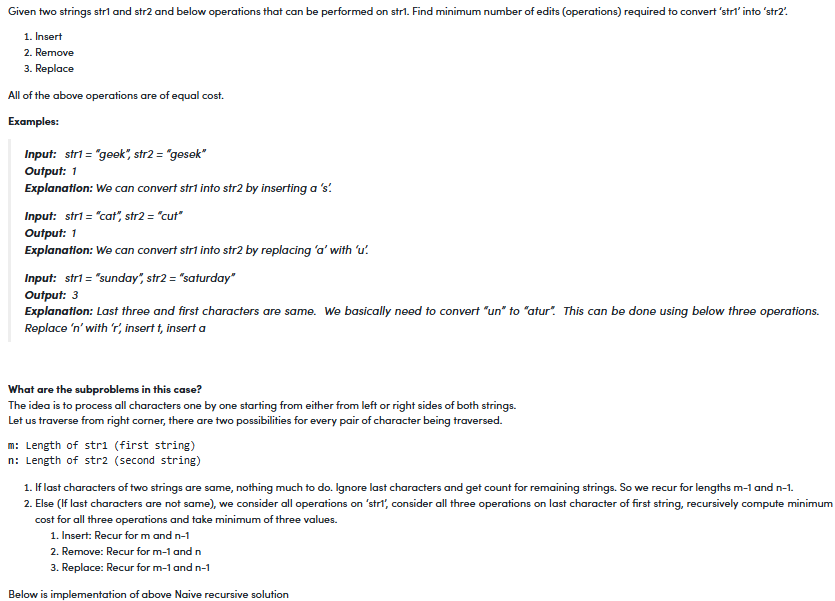

In [10]:
# A Naive recursive Python program to find minimum number
# operations to convert str1 to str2


def editDistance(str1, str2, m, n):

	# If first string is empty, the only option is to
	# insert all characters of second string into first
	if m == 0:
		return n

	# If second string is empty, the only option is to
	# remove all characters of first string
	if n == 0:
		return m

	# If last characters of two strings are same, nothing
	# much to do. Ignore last characters and get count for
	# remaining strings.
	if str1[m-1] == str2[n-1]:
		return editDistance(str1, str2, m-1, n-1)

	# If last characters are not same, consider all three
	# operations on last character of first string, recursively
	# compute minimum cost for all three operations and take
	# minimum of three values.
	return 1 + min(editDistance(str1, str2, m, n-1), # Insert
				editDistance(str1, str2, m-1, n), # Remove
				editDistance(str1, str2, m-1, n-1) # Replace
				)


# Driver code
str1 = "sunday"
str2 = "saturday"
print (editDistance(str1, str2, len(str1), len(str2)))

3


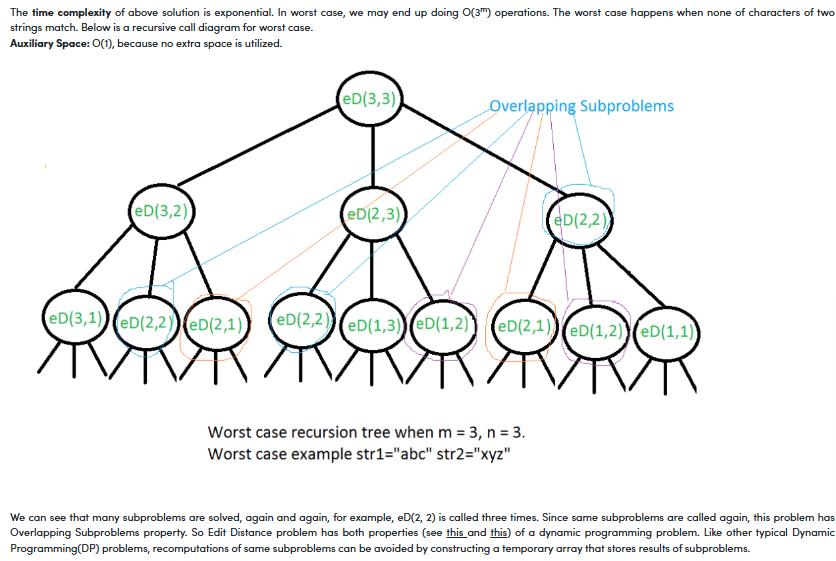

In [11]:
# A Dynamic Programming based Python program for edit
# distance problem


def editDistDP(str1, str2, m, n):
	# Create a table to store results of subproblems
	dp = [[0 for x in range(n + 1)] for x in range(m + 1)]

	# Fill d[][] in bottom up manner
	for i in range(m + 1):
		for j in range(n + 1):

			# If first string is empty, only option is to
			# insert all characters of second string
			if i == 0:
				dp[i][j] = j # Min. operations = j

			# If second string is empty, only option is to
			# remove all characters of second string
			elif j == 0:
				dp[i][j] = i # Min. operations = i

			# If last characters are same, ignore last char
			# and recur for remaining string
			elif str1[i-1] == str2[j-1]:
				dp[i][j] = dp[i-1][j-1]

			# If last character are different, consider all
			# possibilities and find minimum
			else:
				dp[i][j] = 1 + min(dp[i][j-1],	 # Insert
								dp[i-1][j],	 # Remove
								dp[i-1][j-1]) # Replace

	return dp[m][n]


# Driver code
str1 = "sunday"
str2 = "saturday"

print(editDistDP(str1, str2, len(str1), len(str2)))

3


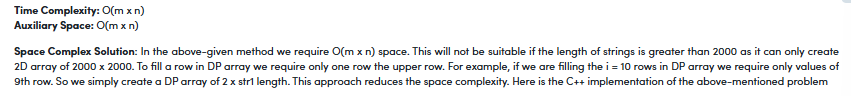

In [12]:
# A Space efficient Dynamic Programming
# based Python3 program to find minimum
# number operations to convert str1 to str2
def EditDistDP(str1, str2):

	len1 = len(str1)
	len2 = len(str2)

	# Create a DP array to memoize result
	# of previous computations
	DP = [[0 for i in range(len1 + 1)]
			for j in range(2)];

	# Base condition when second String
	# is empty then we remove all characters
	for i in range(0, len1 + 1):
		DP[0][i] = i

	# Start filling the DP
	# This loop run for every
	# character in second String
	for i in range(1, len2 + 1):

		# This loop compares the char from
		# second String with first String
		# characters
		for j in range(0, len1 + 1):

			# If first String is empty then
			# we have to perform add character
			# operation to get second String
			if (j == 0):
				DP[i % 2][j] = i

			# If character from both String
			# is same then we do not perform any
			# operation . here i % 2 is for bound
			# the row number.
			elif(str1[j - 1] == str2[i-1]):
				DP[i % 2][j] = DP[(i - 1) % 2][j - 1]

			# If character from both String is
			# not same then we take the minimum
			# from three specified operation
			else:
				DP[i % 2][j] = (1 + min(DP[(i - 1) % 2][j],
									min(DP[i % 2][j - 1],
								DP[(i - 1) % 2][j - 1])))

	# After complete fill the DP array
	# if the len2 is even then we end
	# up in the 0th row else we end up
	# in the 1th row so we take len2 % 2
	# to get row
	print(DP[len2 % 2][len1], "")

# Driver code
if __name__ == '__main__':

	str1 = "food"
	str2 = "money"

	EditDistDP(str1, str2)

4 


Time Complexity: O(m x n)

Auxiliary Space: O( m )

This is a memoized version of recursion i.e. Top-Down DP:

In [13]:
def minDis(s1, s2, n, m, dp):
    # If any string is empty,
    # return the remaining characters of other string
    if(n == 0):
        return m
    if(m == 0):
        return n

    # To check if the recursive tree
    # for given n & m has already been executed
    if(dp[n][m] != -1):
        return dp[n][m]

    # If characters are equal, execute
    # recursive function for n-1, m-1
    if(s1[n - 1] == s2[m - 1]):
        if(dp[n - 1][m - 1] == -1):
            dp[n][m] = minDis(s1, s2, n - 1, m - 1, dp)
            return dp[n][m]
        else:
            dp[n][m] = dp[n - 1][m - 1]
            return dp[n][m]
    # If characters are not equal, we need to
    # find the minimum cost out of all 3 operations.
    else:
        if(dp[n - 1][m] != -1):
            m1 = dp[n - 1][m]
        else:
            m1 = minDis(s1, s2, n - 1, m, dp)

        if(dp[n][m - 1] != -1):
            m2 = dp[n][m - 1]
        else:
            m2 = minDis(s1, s2, n, m - 1, dp)
        if(dp[n - 1][m - 1] != -1):
            m3 = dp[n - 1][m - 1]
        else:
            m3 = minDis(s1, s2, n - 1, m - 1, dp)

        dp[n][m] = 1 + min(m1, min(m2, m3))
        return dp[n][m]

# Driver code
str1 = "voldemort"
str2 = "dumbledore"

n = len(str1)
m = len(str2)
dp = [[-1 for i in range(m + 1)] for j in range(n + 1)]

print(minDis(str1, str2, n, m, dp))

7


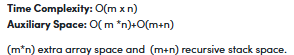

# Longest Common Increasing Subsequence

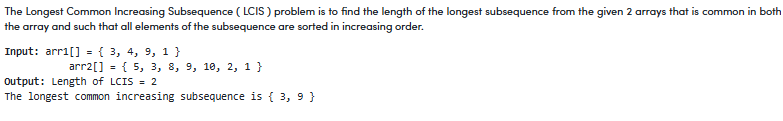

In [14]:
# Returns the length and the LCIS of two
# arrays arr1[0..n-1] and arr2[0..m-1]
def LCIS(arr1, n, arr2, m):

    # table[j] is going to store length of LCIS
    # ending with arr2[j]. We initialize it as 0,
    table = [0] * m
    for j in range(m):
        table[j] = 0

    # Traverse all elements of arr1[]
    for i in range(n):

        # Initialize current length of LCIS
        current = 0

        # For each element of arr1[],
        # traverse all elements of arr2[].
        for j in range(m):

            # If both the array have same elements.
            # Note that we don't break the loop here.
            if (arr1[i] == arr2[j]):
                if (current + 1 > table[j]):
                    table[j] = current + 1

            # Now seek for previous smaller common
            # element for current element of arr1
            if (arr1[i] > arr2[j]):
                if (table[j] > current):
                    current = table[j]

    # The maximum value in table[]
    # is out result
    result = 0
    for i in range(m):
        if (table[i] > result):
            result = table[i]

    return result

if __name__ == "__main__":

    arr1 = [3, 4, 9, 1]
    arr2 = [5, 3, 8, 9, 10, 2, 1]

    n = len(arr1)
    m = len(arr2)

    print ("Length of LCIS is", LCIS(arr1, n, arr2, m))

Length of LCIS is 2


**Length of LCIS is 2**

# Variation in **LIS**

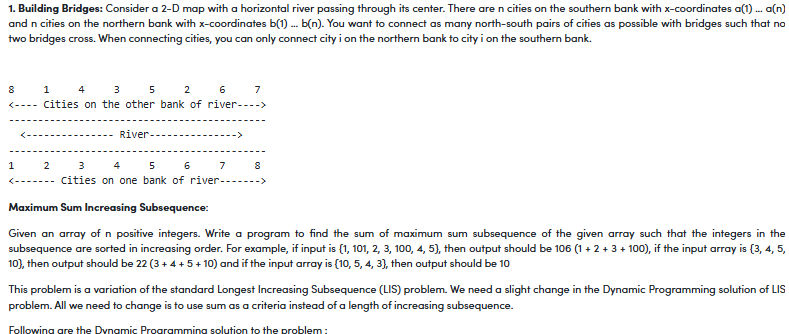

In [15]:
# code
# Dynamic Programming based Python
# implementation of Maximum Sum
# Increasing Subsequence (MSIS)
# problem

# maxSumIS() returns the maximum
# sum of increasing subsequence
# in arr[] of size n
def maxSumIS(arr, n):
	max = 0
	msis = [0 for x in range(n)]

	# Initialize msis values
	# for all indexes
	for i in range(n):
		msis[i] = arr[i]

	# Compute maximum sum
	# values in bottom up manner
	for i in range(1, n):
		for j in range(i):
			if (arr[i] > arr[j] and
				msis[i] < msis[j] + arr[i]):
				msis[i] = msis[j] + arr[i]

	# Pick maximum of
	# all msis values
	for i in range(n):
		if max < msis[i]:
			max = msis[i]

	return max

# Driver Code
arr = [1, 101, 2, 3, 100, 4, 5]
n = len(arr)
print("Sum of maximum sum increasing " +
					"subsequence is " +
				str(maxSumIS(arr, n)))

Sum of maximum sum increasing subsequence is 106


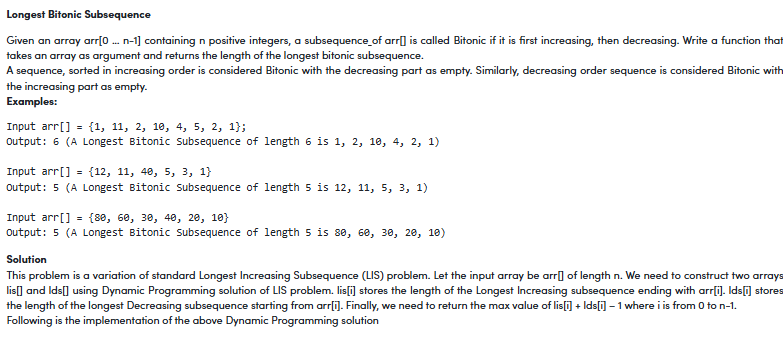

In [16]:
# code
# Dynamic Programming implementation of longest bitonic subsequence problem
"""
lbs() returns the length of the Longest Bitonic Subsequence in
arr[] of size n. The function mainly creates two temporary arrays
lis[] and lds[] and returns the maximum lis[i] + lds[i] - 1.

lis[i] ==> Longest Increasing subsequence ending with arr[i]
lds[i] ==> Longest decreasing subsequence starting with arr[i]
"""

def lbs(arr):
	n = len(arr)


	# allocate memory for LIS[] and initialize LIS values as 1
	# for all indexes
	lis = [1 for i in range(n+1)]

	# Compute LIS values from left to right
	for i in range(1 , n):
		for j in range(0 , i):
			if ((arr[i] > arr[j]) and (lis[i] < lis[j] +1)):
				lis[i] = lis[j] + 1

	# allocate memory for LDS and initialize LDS values for
	# all indexes
	lds = [1 for i in range(n+1)]

	# Compute LDS values from right to left
	for i in reversed(range(n-1)): #loop from n-2 downto 0
		for j in reversed(range(i-1 ,n)): #loop from n-1 downto i-1
			if(arr[i] > arr[j] and lds[i] < lds[j] + 1):
				lds[i] = lds[j] + 1


	# Return the maximum value of (lis[i] + lds[i] - 1)
	maximum = lis[0] + lds[0] - 1
	for i in range(1 , n):
		maximum = max((lis[i] + lds[i]-1), maximum)

	return maximum

# Driver program to test the above function
arr = [0 , 8 , 4, 12, 2, 10 , 6 , 14 , 1 , 9 , 5 , 13,
		3, 11 , 7 , 15]
print ("Length of LBS is",lbs(arr))

Length of LBS is 7


# Rope Cutting Problem

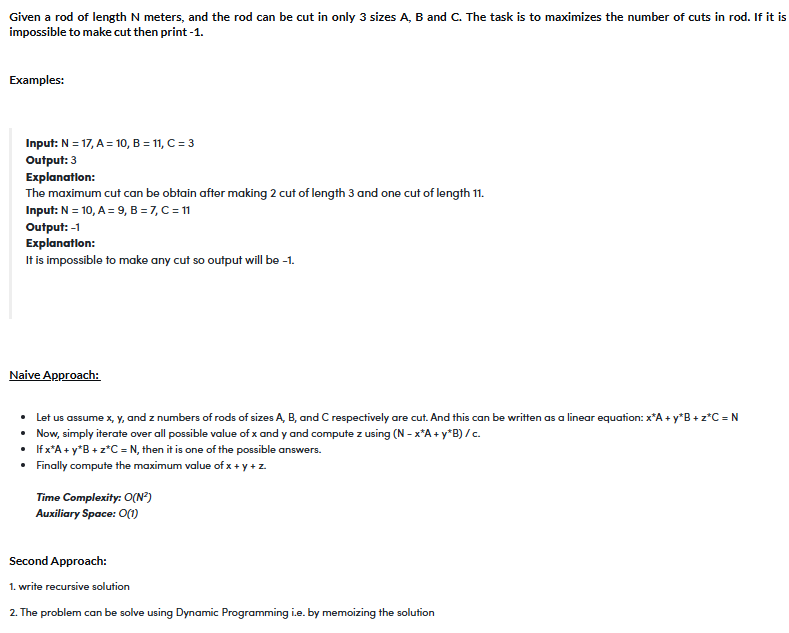

In [17]:
# Rope Cutting Problem

def maxpeices(n,a,b,c) :
    if n == 0 :
        return 0
    if n <= -1 :
        return -1
    res = max(maxpeices(n-a,a,b,c),
              maxpeices(n-b,a,b,c),
              maxpeices(n-c,a,b,c))
    if res == -1 :
        return -1
    return res + 1


n = 23
a = 11
b = 9
c = 12
print(maxpeices(n,a,b,c))

2


**After memoization**

In [18]:
def maxPieces(n, a, b, c, memo):
    if n == 0:
        return 0
    if n < 0:
        return -1
    if n in memo:
        return memo[n]

    res = max(maxPieces(n - a, a, b, c, memo),
              maxPieces(n - b, a, b, c, memo),
              maxPieces(n - c, a, b, c, memo))

    if res == -1:
        memo[n] = -1
    else:
        memo[n] = res + 1

    return memo[n]

def maxPiecesMemoized(n, a, b, c):
    memo = {}
    return maxPieces(n, a, b, c, memo)

# Test case
n = 23
a = 11
b = 9
c = 12
print(maxPiecesMemoized(n, a, b, c))  # Output: 2

2


# Find minimum number of coins that make a given value

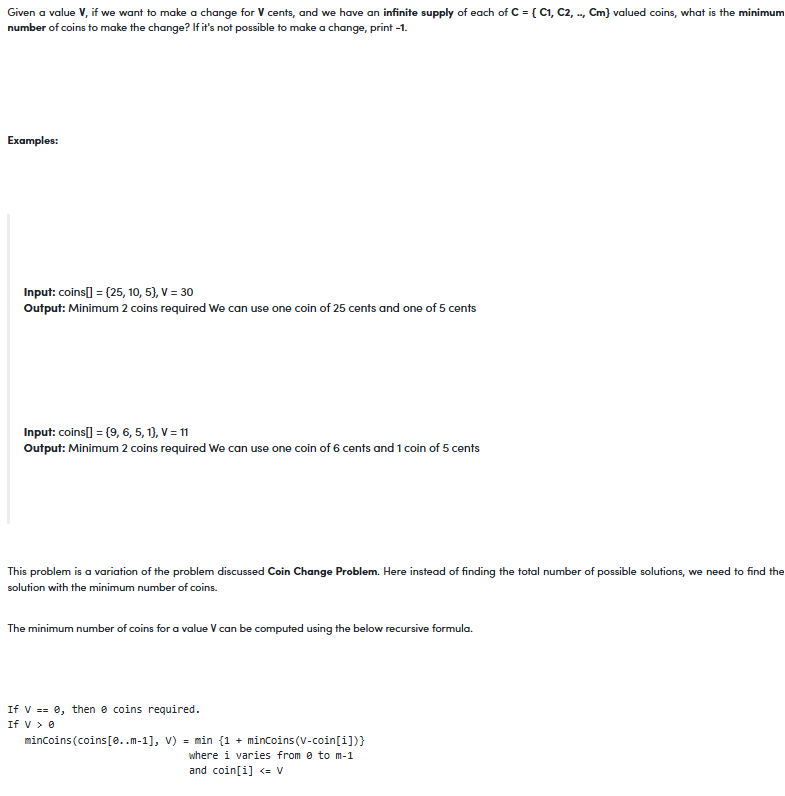

In [19]:
# A Naive recursive python program to find minimum of coins
# to make a given change V

import sys

# m is size of coins array (number of different coins)
def minCoins(coins, m, V):

    # base case
    if (V == 0):
        return 0

    # Initialize result
    res = sys.maxsize

    # Try every coin that has smaller value than V
    for i in range(0, m):
        if (coins[i] <= V):
            sub_res = minCoins(coins, m, V-coins[i])

            # Check for INT_MAX to avoid overflow and see if
            # result can minimized
            if (sub_res != sys.maxsize and sub_res + 1 < res):
                res = sub_res + 1

    return res

# Driver program to test above function
coins = [9, 6, 5, 1]
m = len(coins)
V = 11
print("Minimum coins required is",minCoins(coins, m, V))

Minimum coins required is 2


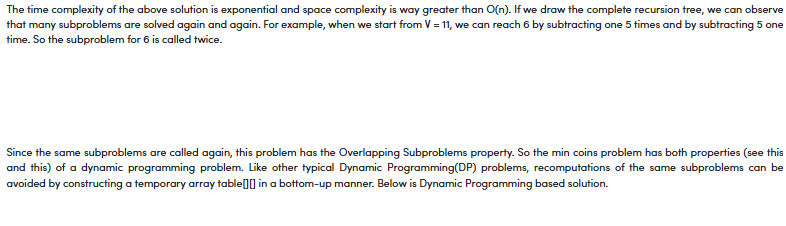

In [20]:
# A Dynamic Programming based Python3 program to
# find minimum of coins to make a given change V
import sys

# m is size of coins array (number of
# different coins)
def minCoins(coins, m, V):

    # table[i] will be storing the minimum
    # number of coins required for i value.
    # So table[V] will have result
    table = [0 for i in range(V + 1)]

    # Base case (If given value V is 0)
    table[0] = 0

    # Initialize all table values as Infinite
    for i in range(1, V + 1):
        table[i] = sys.maxsize

    # Compute minimum coins required
    # for all values from 1 to V
    for i in range(1, V + 1):

        # Go through all coins smaller than i
        for j in range(m):
            if (coins[j] <= i):
                sub_res = table[i - coins[j]]
                if (sub_res != sys.maxsize and
                    sub_res + 1 < table[i]):
                    table[i] = sub_res + 1

    if table[V] == sys.maxsize:
        return -1

    return table[V]

# Driver Code
if __name__ == "__main__":

    coins = [9, 6, 5, 1]
    m = len(coins)
    V = 11
    print("Minimum coins required is ",
                 minCoins(coins, m, V))

Minimum coins required is  2


**Time complexity: O(mV).**

# 0-1 Knapsack Problem

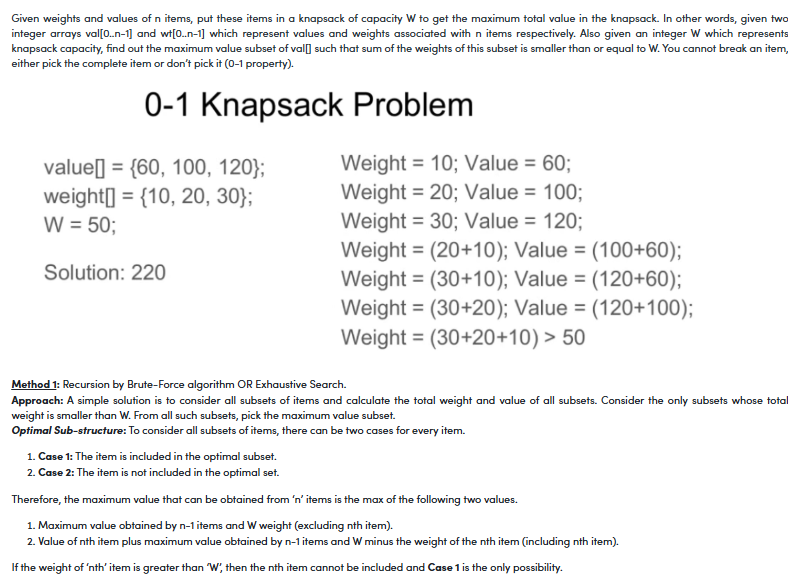

In [22]:
# A naive recursive implementation
# of 0-1 Knapsack Problem

# Returns the maximum value that
# can be put in a knapsack of
# capacity W


def knapSack(W, wt, val, n):

	# Base Case
	if n == 0 or W == 0:
		return 0

	# If weight of the nth item is
	# more than Knapsack of capacity W,
	# then this item cannot be included
	# in the optimal solution
	if (wt[n-1] > W):
		return knapSack(W, wt, val, n-1)

	# return the maximum of two cases:
	# (1) nth item included
	# (2) not included
	else:
		return max(
			val[n-1] + knapSack(
				W-wt[n-1], wt, val, n-1),
			knapSack(W, wt, val, n-1))

# end of function knapSack


#Driver Code
val = [60, 100, 120]
wt = [10, 20, 30]
W = 50
n = len(val)
print (knapSack(W, wt, val, n))

220


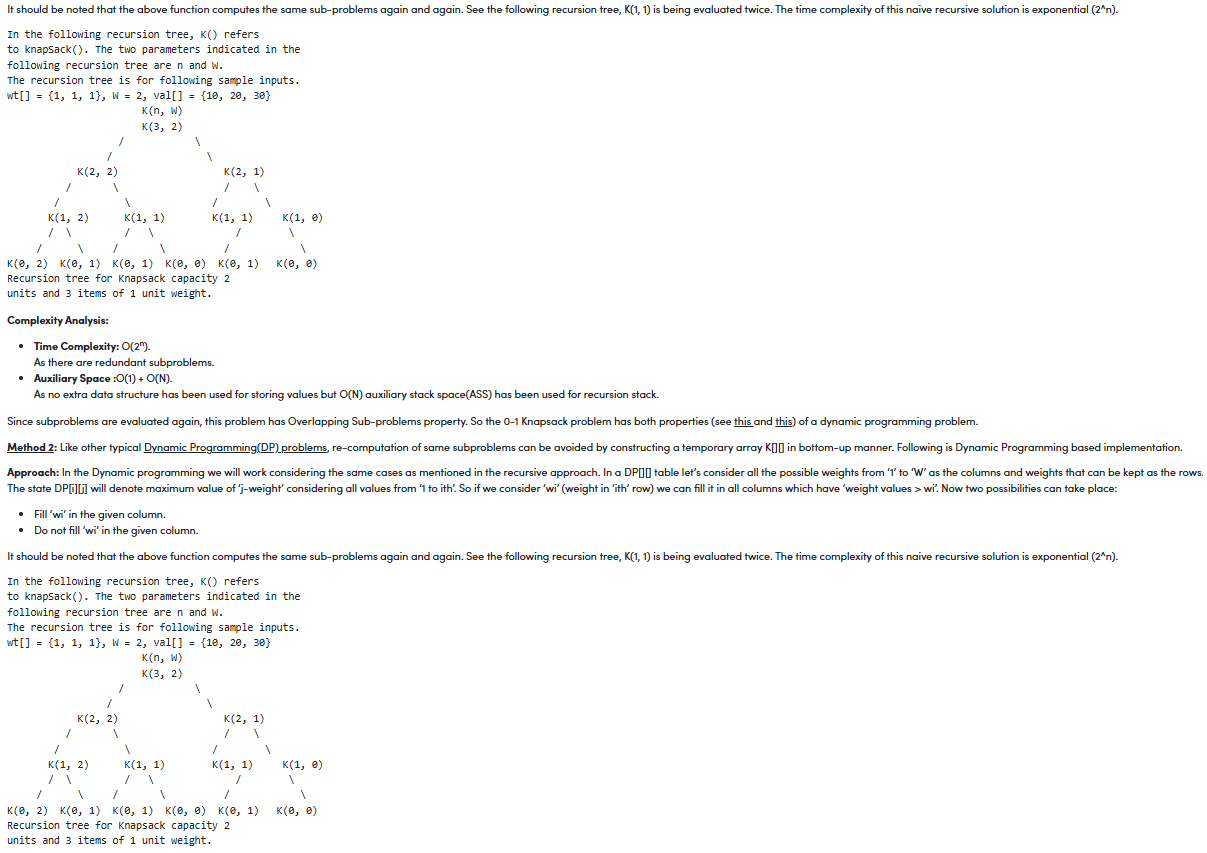

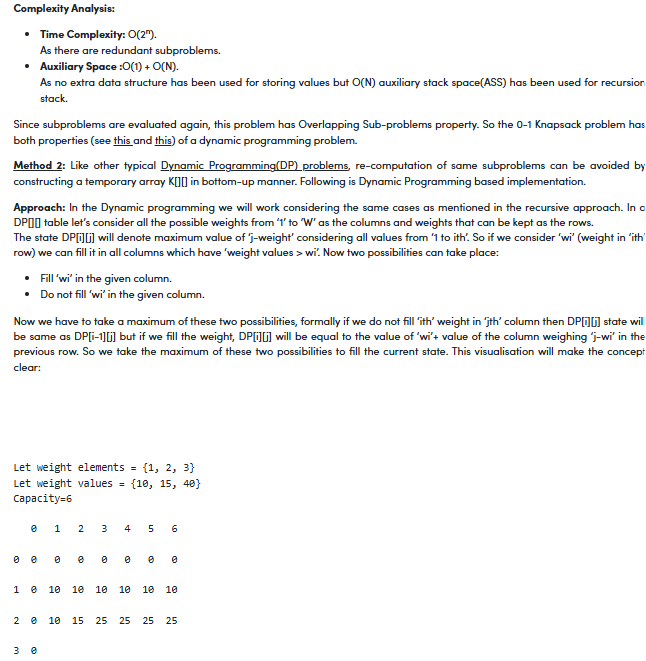

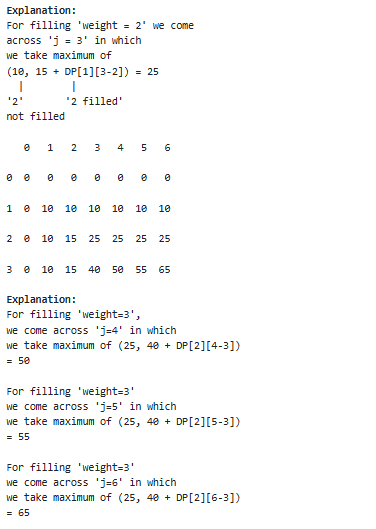

In [23]:
# A Dynamic Programming based Python
# Program for 0-1 Knapsack problem
# Returns the maximum value that can
# be put in a knapsack of capacity W


def knapSack(W, wt, val, n):
	K = [[0 for x in range(W + 1)] for x in range(n + 1)]

	# Build table K[][] in bottom up manner
	for i in range(n + 1):
		for w in range(W + 1):
			if i == 0 or w == 0:
				K[i][w] = 0
			elif wt[i-1] <= w:
				K[i][w] = max(val[i-1]
						+ K[i-1][w-wt[i-1]],
							K[i-1][w])
			else:
				K[i][w] = K[i-1][w]

	return K[n][W]


# Driver code
val = [60, 100, 120]
wt = [10, 20, 30]
W = 50
n = len(val)
print(knapSack(W, wt, val, n))

220


In [24]:
# we can further improve the above Knapsack function's space
# complexity
def knapSack(W, wt, val, n):

	K = [[0 for x in range(W+1)] for y in range(2)]

	# We know we are always using the current row or
	# the previous row of the array/vector . Thereby we can
	# improve it further by using a 2D array but with only
	# 2 rows i%2 will be giving the index inside the bounds
	# of 2d array K
	for i in range(n + 1):
		for w in range(W + 1):
			if (i == 0 or w == 0):
				K[i % 2][w] = 0
			elif (wt[i - 1] <= w):
				K[i % 2][w] = max(
					val[i - 1]
					+ K[(i - 1) % 2][w - wt[i - 1]],
					K[(i - 1) % 2][w])

			else:
				K[i % 2][w] = K[(i - 1) % 2][w]

	return K[n % 2][W]

# Driver Code
if __name__ == "__main__":

	val = [60, 100, 120]
	wt = [10, 20, 30]
	W = 50
	n = len(val)

	print(knapSack(W, wt, val, n))

220


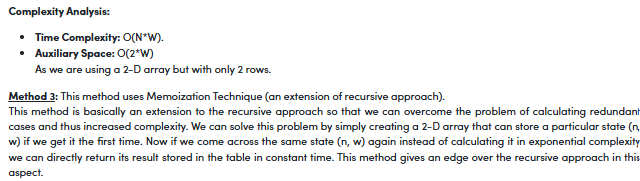

In [25]:
# This is the memoization approach of
# 0 / 1 Knapsack in Python in simple
# we can say recursion + memoization = DP

# driver code
val = [60, 100, 120 ]
wt = [10, 20, 30 ]
W = 50
n = len(val)

# We initialize the matrix with -1 at first.
t = [[-1 for i in range(W + 1)] for j in range(n + 1)]


def knapsack(wt, val, W, n):

	# base conditions
	if n == 0 or W == 0:
		return 0
	if t[n][W] != -1:
		return t[n][W]

	# choice diagram code
	if wt[n-1] <= W:
		t[n][W] = max(
			val[n-1] + knapsack(
				wt, val, W-wt[n-1], n-1),
			knapsack(wt, val, W, n-1))
		return t[n][W]
	elif wt[n-1] > W:
		t[n][W] = knapsack(wt, val, W, n-1)
		return t[n][W]


print(knapsack(wt, val, W, n))

220


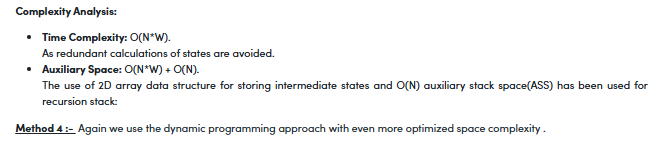

In [26]:
# code
# A Dynamic Programming based Python
# Program for 0-1 Knapsack problem
# Returns the maximum value that can
# be put in a knapsack of capacity W


def knapSack(W, wt, val, n):
	dp = [0 for i in range(W+1)] # Making the dp array

	for i in range(1, n+1): # taking first i elements
		for w in range(W, 0, -1): # starting from back,so that we also have data of
								# previous computation when taking i-1 items
			if wt[i-1] <= w:
				# finding the maximum value
				dp[w] = max(dp[w], dp[w-wt[i-1]]+val[i-1])

	return dp[W] # returning the maximum value of knapsack


# Driver code
val = [60, 100, 120]
wt = [10, 20, 30]
W = 50
n = len(val)
# This code is contributed by Suyash Saxena
print(knapSack(W, wt, val, n))

220


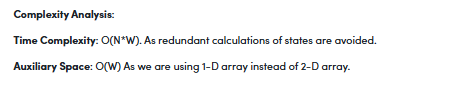

# Optimal Strategy for a Game

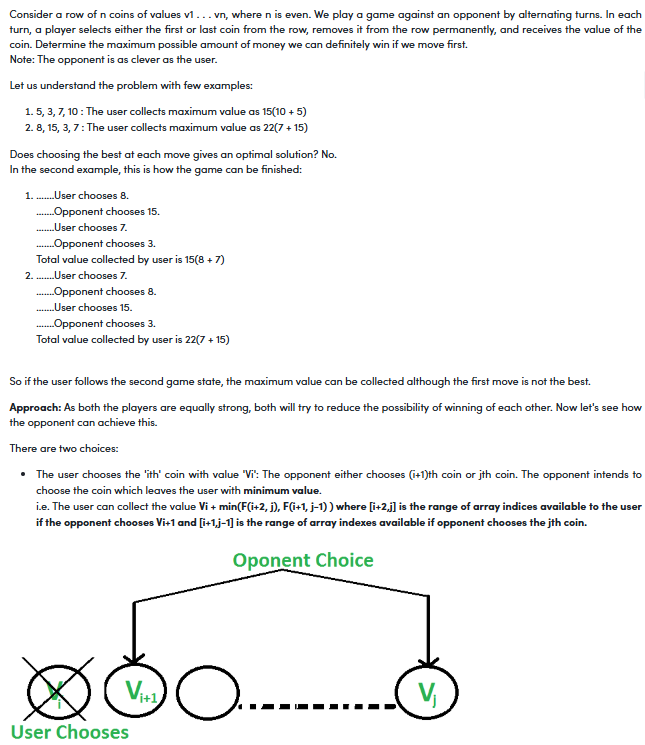

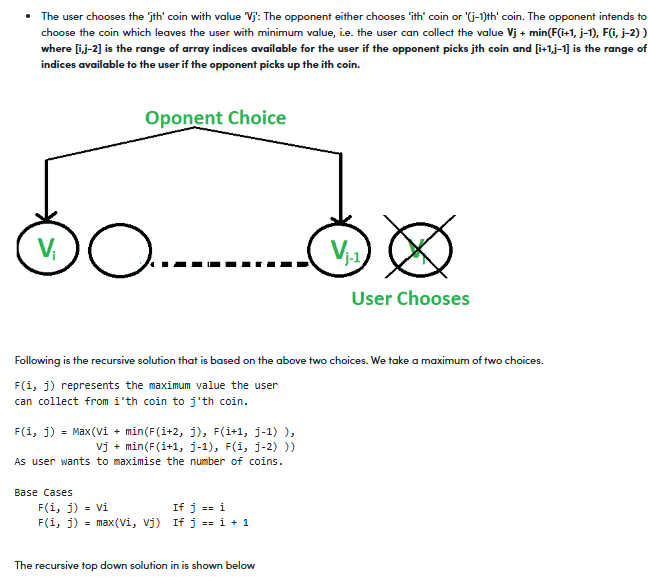

In [27]:
def optimalStrategyOfGame(arr, n):
    memo = {}

    # recursive top down memoized solution
    def solve(i, j):
        if i > j or i >= n or j < 0:
            return 0

        k = (i, j)
        if k in memo:
            return memo[k]

        # if the user chooses ith coin, the opponent can choose from i+1th or jth coin.
        # if he chooses i+1th coin, user is left with [i+2,j] range.
        # if opp chooses jth coin, then user is left with [i+1,j-1] range to choose from.
        # Also opponent tries to choose
        # in such a way that the user has minimum value left.
        option1 = arr[i] + min(solve(i+2, j), solve(i+1, j-1))

        # if user chooses jth coin, opponent can choose ith coin or j-1th coin.
        # if opp chooses ith coin,user can choose in range [i+1,j-1].
        # if opp chooses j-1th coin, user can choose in range [i,j-2].
        option2 = arr[j] + min(solve(i+1, j-1), solve(i, j-2))

        # since the user wants to get maximum money
        memo[k] = max(option1, option2)
        return memo[k]

    return solve(0, n-1)

**The bottom up approach is shown below.**

In [28]:
# Python3 program to find out maximum
# value from a given sequence of coins

# Returns optimal value possible that
# a player can collect from an array
# of coins of size n. Note than n
# must be even


def optimalStrategyOfGame(arr, n):

    # Create a table to store
    # solutions of subproblems
    table = [[0 for i in range(n)]
             for i in range(n)]

    # Fill table using above recursive
    # formula. Note that the table is
    # filled in diagonal fashion
    # (similar to http://goo.gl / PQqoS),
    # from diagonal elements to
    # table[0][n-1] which is the result.
    for gap in range(n):
        for j in range(gap, n):
            i = j - gap

            # Here x is value of F(i + 2, j),
            # y is F(i + 1, j-1) and z is
            # F(i, j-2) in above recursive
            # formula
            x = 0
            if((i + 2) <= j):
                x = table[i + 2][j]
            y = 0
            if((i + 1) <= (j - 1)):
                y = table[i + 1][j - 1]
            z = 0
            if(i <= (j - 2)):
                z = table[i][j - 2]
            table[i][j] = max(arr[i] + min(x, y),
                              arr[j] + min(y, z))
    return table[0][n - 1]


# Driver Code
arr1 = [8, 15, 3, 7]
n = len(arr1)
print(optimalStrategyOfGame(arr1, n))

arr2 = [2, 2, 2, 2]
n = len(arr2)
print(optimalStrategyOfGame(arr2, n))

arr3 = [20, 30, 2, 2, 2, 10]
n = len(arr3)
print(optimalStrategyOfGame(arr3, n))



22
4
42


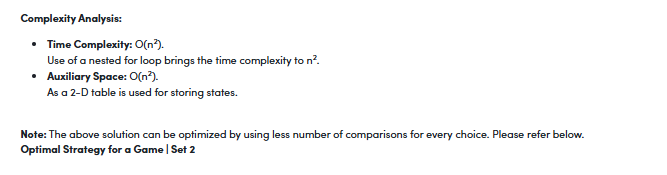

# Egg Dropping Puzzle

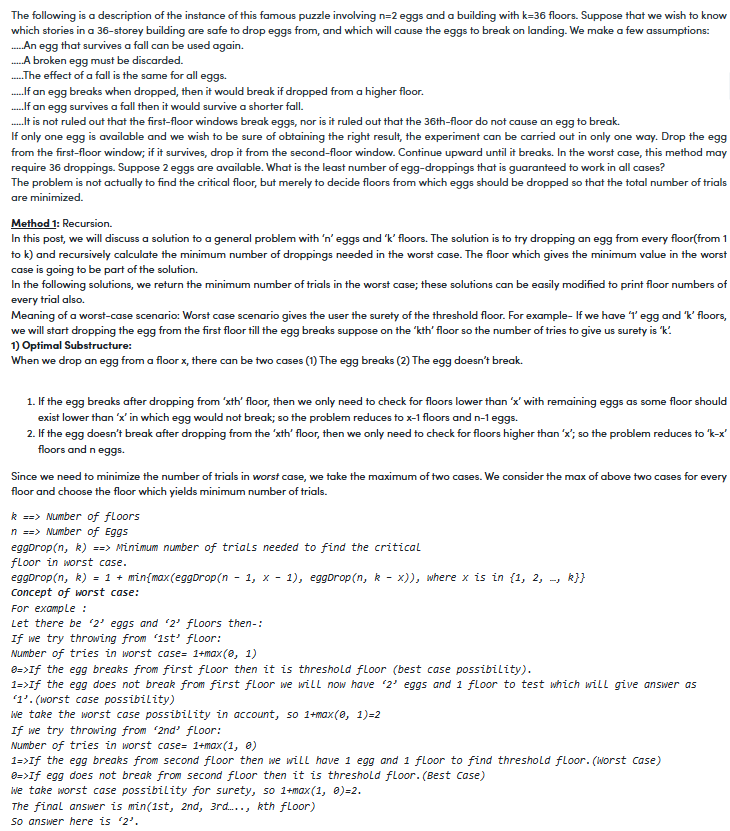

In [29]:
import sys

# Function to get minimum number of trials
# needed in worst case with n eggs and k floors
def eggDrop(n, k):

	# If there are no floors, then no trials
	# needed. OR if there is one floor, one
	# trial needed.
	if (k == 1 or k == 0):
		return k

	# We need k trials for one egg
	# and k floors
	if (n == 1):
		return k

	min = sys.maxsize

	# Consider all droppings from 1st
	# floor to kth floor and return
	# the minimum of these values plus 1.
	for x in range(1, k + 1):

		res = max(eggDrop(n - 1, x - 1),
				eggDrop(n, k - x))
		if (res < min):
			min = res

	return min + 1

# Driver Code
if __name__ == "__main__":

	n = 2
	k = 10
	print("Minimum number of trials in worst case with",
		n, "eggs and", k, "floors is", eggDrop(n, k))

Minimum number of trials in worst case with 2 eggs and 10 floors is 4


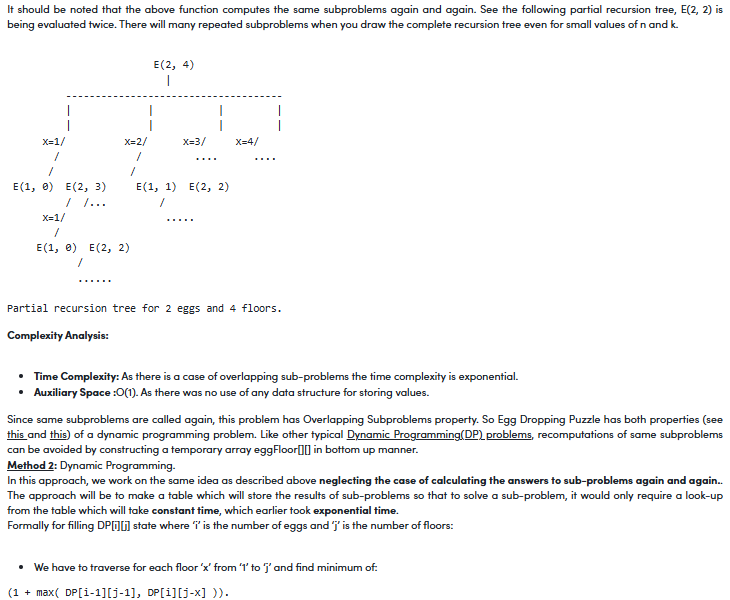

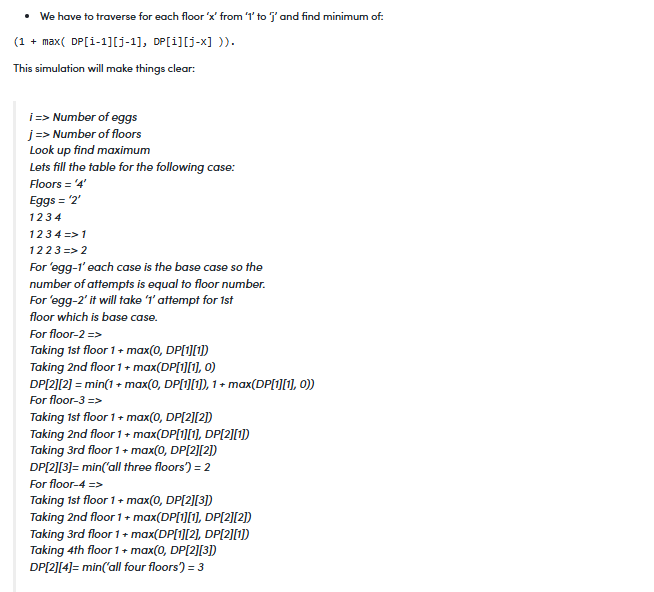

In [30]:
# A Dynamic Programming based Python Program for the Egg Dropping Puzzle
INT_MAX = 32767

# Function to get minimum number of trials needed in worst
# case with n eggs and k floors
def eggDrop(n, k):
	# A 2D table where entry eggFloor[i][j] will represent minimum
	# number of trials needed for i eggs and j floors.
	eggFloor = [[0 for x in range(k + 1)] for x in range(n + 1)]

	# We need one trial for one floor and0 trials for 0 floors
	for i in range(1, n + 1):
		eggFloor[i][1] = 1
		eggFloor[i][0] = 0

	# We always need j trials for one egg and j floors.
	for j in range(1, k + 1):
		eggFloor[1][j] = j

	# Fill rest of the entries in table using optimal substructure
	# property
	for i in range(2, n + 1):
		for j in range(2, k + 1):
			eggFloor[i][j] = INT_MAX
			for x in range(1, j + 1):
				res = 1 + max(eggFloor[i-1][x-1], eggFloor[i][j-x])
				if res < eggFloor[i][j]:
					eggFloor[i][j] = res

	# eggFloor[n][k] holds the result
	return eggFloor[n][k]

# Driver program to test to print printDups
n = 2
k = 36
print("Minimum number of trials in worst case with" + str(n) + "eggs and "
	+ str(k) + " floors is " + str(eggDrop(n, k)))

Minimum number of trials in worst case with2eggs and 36 floors is 8


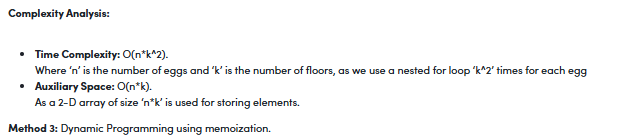

In [31]:
import sys

MAX = 1000;

memo = [[-1 for i in range(MAX)] for j in range(MAX)] ;

def solveEggDrop(n, k):

	if (memo[n][k] != -1):
		return memo[n][k];

	if (k == 1 or k == 0):
		return k;

	if (n == 1):
		return k;

	min = sys.maxsize;
	res = 0;

	for x in range(1,k+1):
		res = max(solveEggDrop(n - 1, x - 1), solveEggDrop(n, k - x));
		if (res < min):
			min = res;


	memo[n][k] = min + 1;
	return min + 1;

# Driver code
if __name__ == '__main__':
	n = 2;
	k = 36;
	print(solveEggDrop(n, k));

8


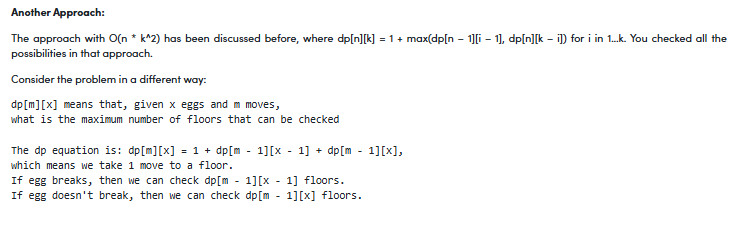

# Count BSTs with n Keys

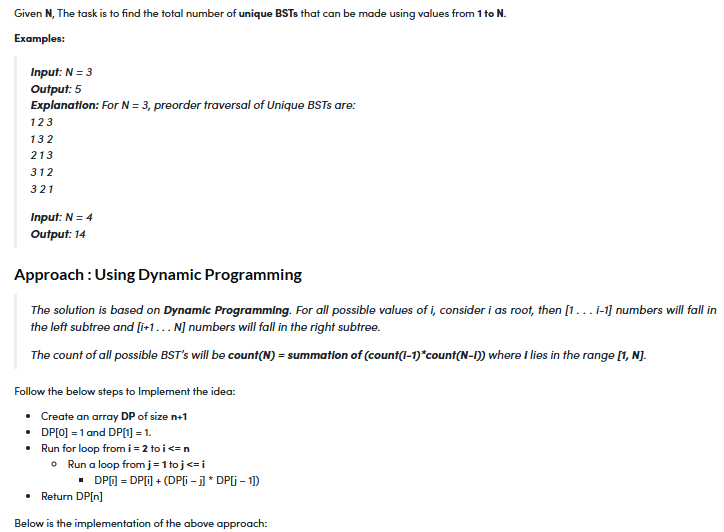

In [32]:
# Python3 code to find number of unique
# BSTs Dynamic Programming solution

# Function to find number of unique BST


def numberOfBST(n):

	# DP to store the number of unique
	# BST with key i
	dp = [0] * (n + 1)

	# Base case
	dp[0], dp[1] = 1, 1

	# fill the dp table in top-down
	# approach.
	for i in range(2, n + 1):
		for j in range(1, i + 1):

			# n-i in right * i-1 in left
			dp[i] = dp[i] + (dp[i - j] *
							dp[j - 1])

	return dp[n]


# Driver Code
if __name__ == "__main__":

	n = 3
	print("Number of structurally Unique BST with",
		n, "keys are :", numberOfBST(n))

Number of structurally Unique BST with 3 keys are : 5


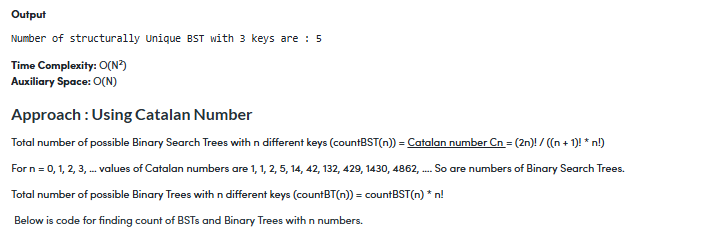

In [33]:
# A function to find factorial of a given number
def factorial(n) :
	res = 1

	# Calculate value of [1*(2)*---*
	#(n-k+1)] / [k*(k-1)*---*1]
	for i in range(1, n + 1):
		res *= i
	return res

def binomialCoeff(n, k):

	res = 1

	# Since C(n, k) = C(n, n-k)
	if (k > n - k):
		k = n - k

	# Calculate value of [n*(n-1)*---*(n-k+1)] /
	# [k*(k-1)*---*1]
	for i in range(k):

		res *= (n - i)
		res //= (i + 1)

	return res

# A Binomial coefficient based function to
# find nth catalan number in O(n) time
def catalan(n):

	# Calculate value of 2nCn
	c = binomialCoeff(2 * n, n)

	# return 2nCn/(n+1)
	return c // (n + 1)

# A function to count number of BST
# with n nodes using catalan
def countBST(n):

	# find nth catalan number
	count = catalan(n)

	# return nth catalan number
	return count

# A function to count number of binary
# trees with n nodes
def countBT(n):

	# find count of BST with n numbers
	count = catalan(n)

	# return count * n!
	return count * factorial(n)

# Driver Code
if __name__ == '__main__':

	n = 5

	# find count of BST and binary
	# trees with n nodes
	count1 = countBST(n)
	count2 = countBT(n)

	# print count of BST and binary trees with n nodes
	print("Count of BST with", n, "nodes is", count1)
	print("Count of binary trees with", n,
					"nodes is", count2)

Count of BST with 5 nodes is 42
Count of binary trees with 5 nodes is 5040


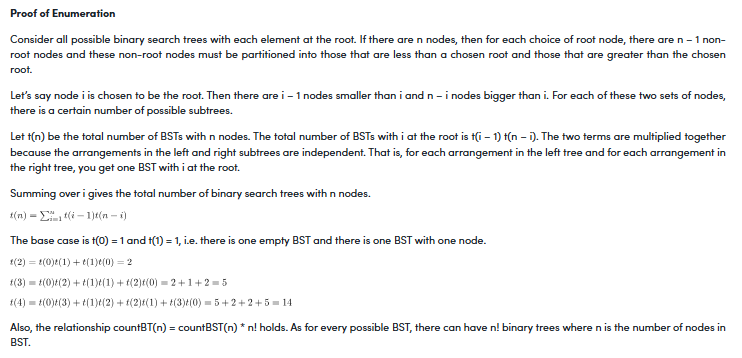

# Maximum Sum with No Two Consecutive

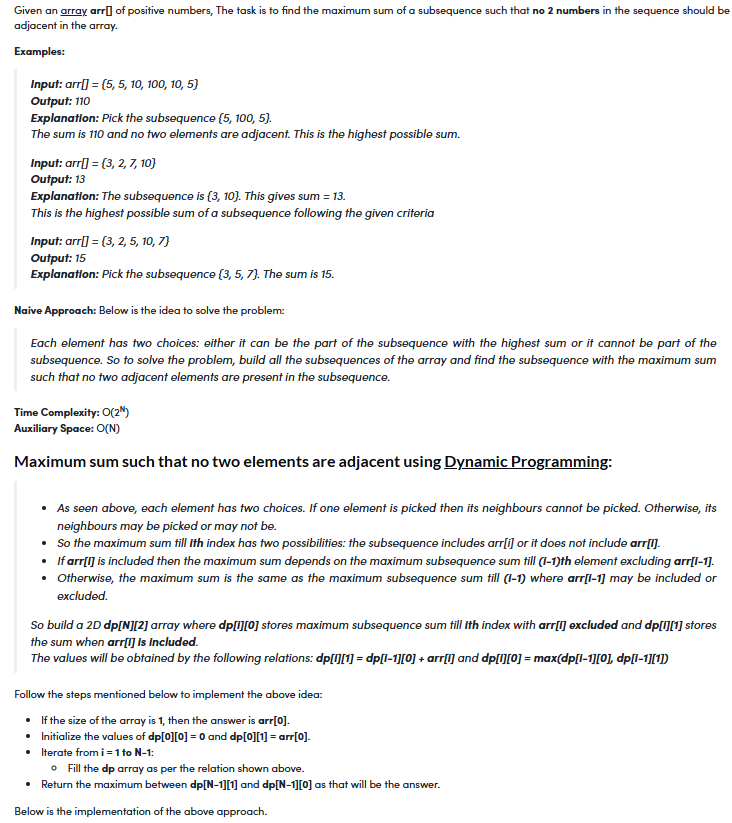

In [34]:
def maxSum(arr):
    n = len(arr)

    dp = [None] * (n+1)

    dp[1]= arr[0]
    dp[2] = max(arr[0],arr[1])

    for i in range(3,n+1):
        dp[i]= max(dp[i-1],dp[i-2]+ arr[i-1])

    return dp[n]



arr = [10,20,30,40,50]

print(maxSum(arr))

90


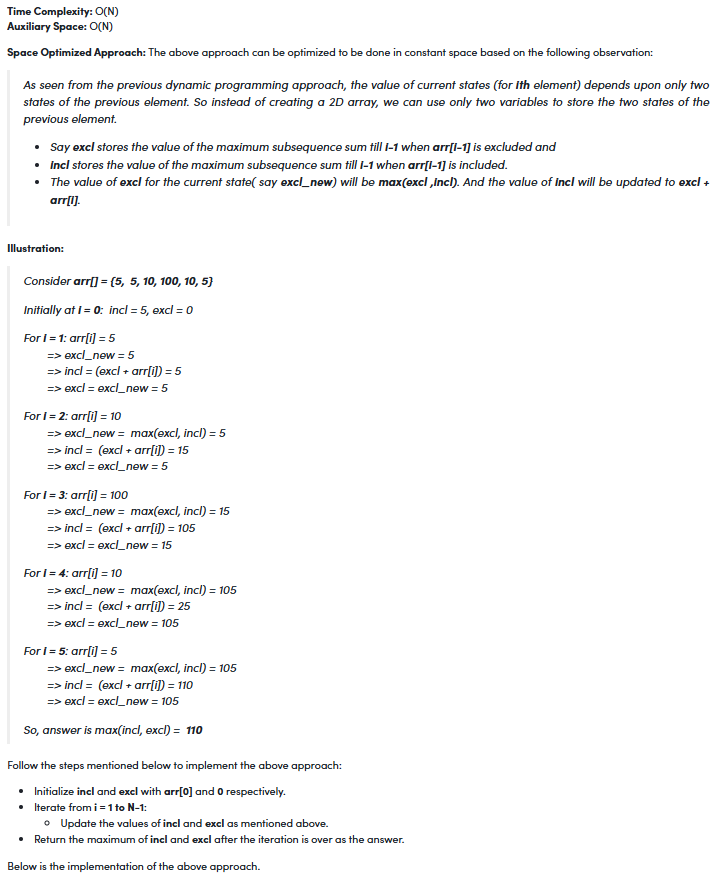

In [35]:
def maxSum(arr):
    prev_prev = arr[0]
    prev = max(arr[0],arr[1])
    res = prev

    for i in range(3,len(arr)+1):
        res = max(prev,prev_prev + arr[i-1])
        prev_prev = prev
        prev = res

    return res



arr = [10,20,30,40,50]

print(maxSum(arr))

90


**Time Complexity: O(N)**

**Auxiliary Space: O(1)**.



# Subset Sum Problem

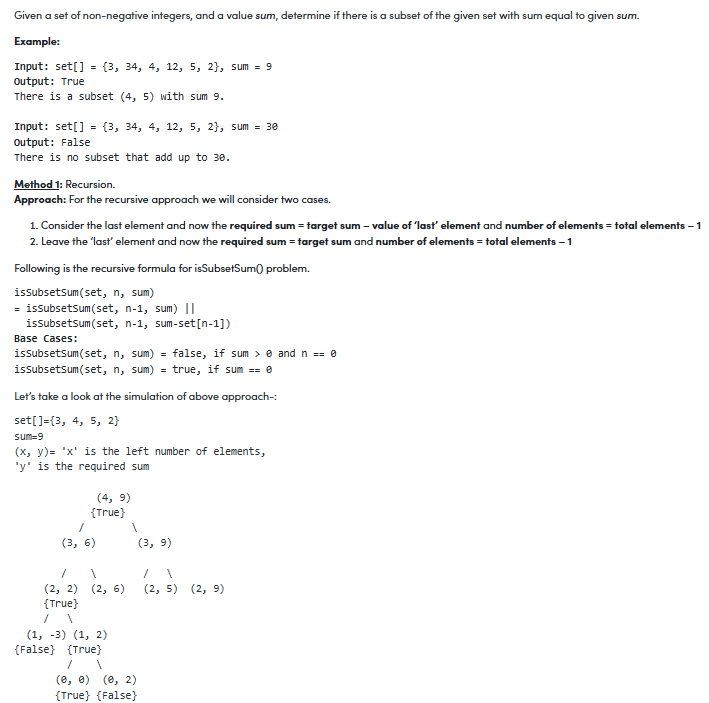

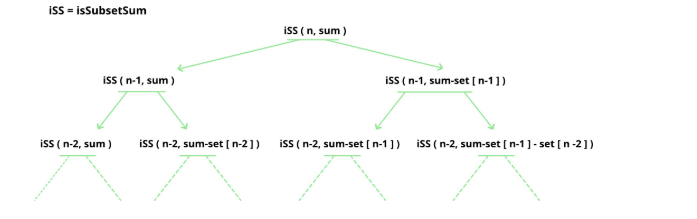

In [36]:
# A recursive solution for subset sum
# problem

# Returns true if there is a subset
# of set[] with sun equal to given sum


def isSubsetSum(set, n, sum):

	# Base Cases
	if (sum == 0):
		return True
	if (n == 0):
		return False

	# If last element is greater than
	# sum, then ignore it
	if (set[n - 1] > sum):
		return isSubsetSum(set, n - 1, sum)

	# else, check if sum can be obtained
	# by any of the following
	# (a) including the last element
	# (b) excluding the last element
	return isSubsetSum(
		set, n-1, sum) or isSubsetSum(
		set, n-1, sum-set[n-1])


# Driver code
set = [3, 34, 4, 12, 5, 2]
sum = 9
n = len(set)
if (isSubsetSum(set, n, sum) == True):
	print("Found a subset with given sum")
else:
	print("No subset with given sum")

Found a subset with given sum


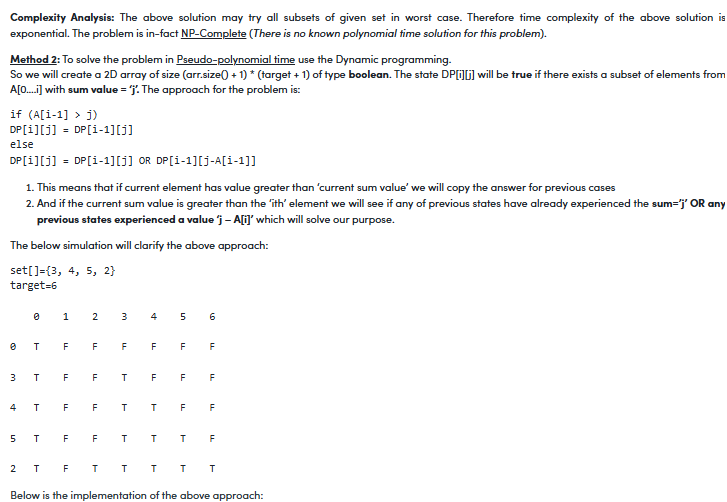

In [37]:
# A Dynamic Programming solution for subset
# sum problem Returns true if there is a subset of
# set[] with sun equal to given sum

# Returns true if there is a subset of set[]
# with sum equal to given sum
def isSubsetSum(set, n, sum):

	# The value of subset[i][j] will be
	# true if there is a
	# subset of set[0..j-1] with sum equal to i
	subset =([[False for i in range(sum + 1)]
			for i in range(n + 1)])

	# If sum is 0, then answer is true
	for i in range(n + 1):
		subset[i][0] = True

	# If sum is not 0 and set is empty,
	# then answer is false
	for i in range(1, sum + 1):
		subset[0][i]= False

	# Fill the subset table in bottom up manner
	for i in range(1, n + 1):
		for j in range(1, sum + 1):
			if j<set[i-1]:
				subset[i][j] = subset[i-1][j]
			if j>= set[i-1]:
				subset[i][j] = (subset[i-1][j] or
								subset[i - 1][j-set[i-1]])

	# uncomment this code to print table
	# for i in range(n + 1):
	# for j in range(sum + 1):
	# print (subset[i][j], end =" ")
	# print()
	return subset[n][sum]

# Driver code
if __name__=='__main__':
	set = [3, 34, 4, 12, 5, 2]
	sum = 9
	n = len(set)
	if (isSubsetSum(set, n, sum) == True):
		print("Found a subset with given sum")
	else:
		print("No subset with given sum")

Found a subset with given sum


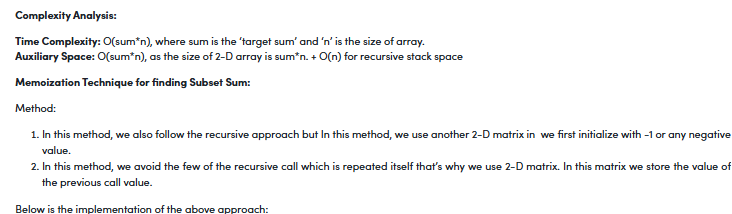

In [38]:
# Python program for the above approach

# Taking the matrix as globally
tab = [[-1 for i in range(2000)] for j in range(2000)]

# Check if possible subset with
# given sum is possible or not
def subsetSum(a, n, sum):

	# If the sum is zero it means
	# we got our expected sum
	if (sum == 0):
		return 1

	if (n <= 0):
		return 0

	# If the value is not -1 it means it
	# already call the function
	# with the same value.
	# it will save our from the repetition.
	if (tab[n - 1][sum] != -1):
		return tab[n - 1][sum]

	# if the value of a[n-1] is
	# greater than the sum.
	# we call for the next value
	if (a[n - 1] > sum):
		tab[n - 1][sum] = subsetSum(a, n - 1, sum)
		return tab[n - 1][sum]
	else:

		# Here we do two calls because we
		# don't know which value is
		# full-fill our criteria
		# that's why we doing two calls
		tab[n - 1][sum] = subsetSum(a, n - 1, sum)
		return tab[n - 1][sum] or subsetSum(a, n - 1, sum - a[n - 1])

# Driver Code

n = 5
a = [1, 5, 3, 7, 4]
sum = 12

if (subsetSum(a, n, sum)):
	print("YES")
else:
	print("NO")

YES


**Complexity Analysis:**

Time Complexity: O(sum*n), where sum is the ‘target sum’ and ‘n’ is the size of array.


Auxiliary Space: O(sum*n) + O(n) -> O(sum*n) = the size of 2-D array is sum*n and O(n)=auxiliary stack space.

## Matrix Chain Multiplication

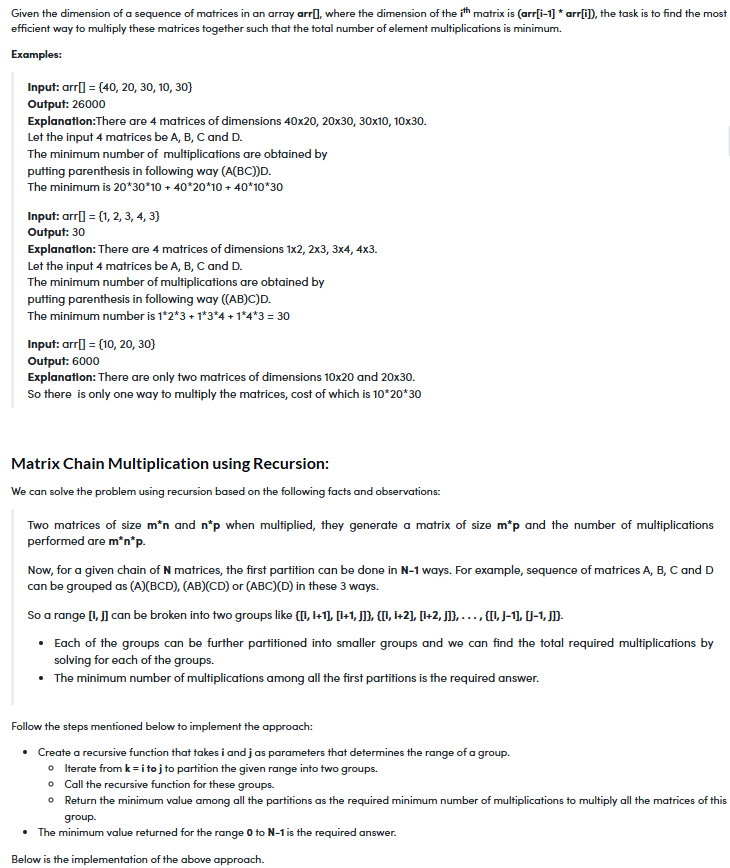

In [39]:
# Python code to implement the
# matrix chain multiplication using recursion

import sys

# Matrix A[i] has dimension p[i-1] x p[i]
# for i = 1..n
def MatrixChainOrder(p, i, j):
    if i == j:
        return 0

    _min = sys.maxsize

    # Place parenthesis at different places
    # between first and last matrix,
    # recursively calculate count of multiplications
    # for each parenthesis placement
    # and return the minimum count
    for k in range(i, j):

        count = (MatrixChainOrder(p, i, k)
                 + MatrixChainOrder(p, k + 1, j)
                 + p[i-1] * p[k] * p[j])

        if count < _min:
            _min = count

    # Return minimum count
    return _min


# Driver code
if __name__ == '__main__':
    arr = [1, 2, 3, 4, 3]
    N = len(arr)

    # Function call
    print("Minimum number of multiplications is ",
      MatrixChainOrder(arr, 1, N-1))

Minimum number of multiplications is  30


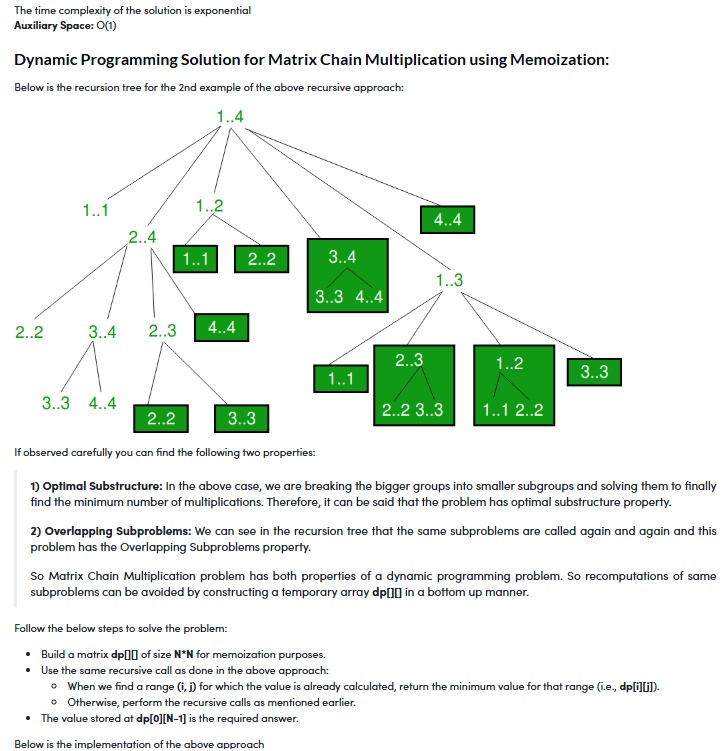

In [40]:
# Python program using memoization
import sys
dp = [[-1 for i in range(100)] for j in range(100)]

# Function for matrix chain multiplication
def matrixChainMemoised(p, i, j):
    if(i == j):
        return 0

    if(dp[i][j] != -1):
        return dp[i][j]

    dp[i][j] = sys.maxsize

    for k in range(i,j):
        dp[i][j] = min(dp[i][j], matrixChainMemoised(p, i, k) + matrixChainMemoised(p, k + 1, j)+ p[i - 1] * p[k] * p[j])

    return dp[i][j]

def MatrixChainOrder(p,n):
    i = 1
    j = n - 1
    return matrixChainMemoised(p, i, j)

# Driver Code
arr = [1, 2, 3, 4]
n = len(arr)
print("Minimum number of multiplications is",MatrixChainOrder(arr, n))

Minimum number of multiplications is 18


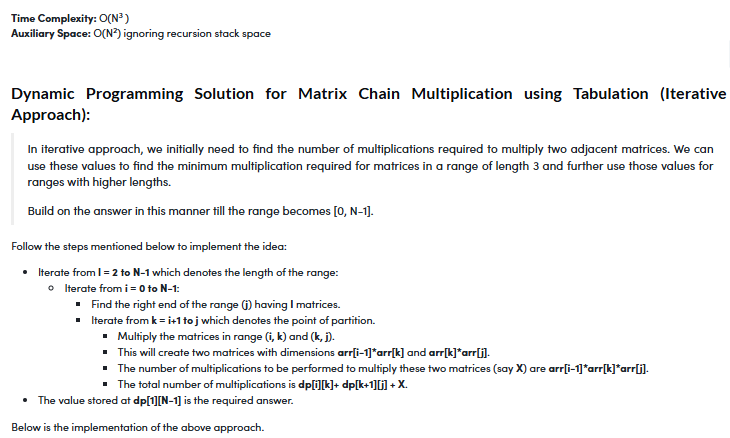

In [41]:
# Dynamic Programming Python implementation of Matrix
# Chain Multiplication. See the Cormen book for details
# of the following algorithm
import sys
maxint=int(1e9+7)
# Matrix Ai has dimension p[i-1] x p[i] for i = 1..n


def MatrixChainOrder(p, n):
    # For simplicity of the program,
    # one extra row and one
    # extra column are allocated in m[][].
    # 0th row and 0th
    # column of m[][] are not used
    m = [[0 for x in range(n)] for x in range(n)]

    # m[i, j] = Minimum number of scalar
    # multiplications needed
    # to compute the matrix A[i]A[i + 1]...A[j] =
    # A[i..j] where
    # dimension of A[i] is p[i-1] x p[i]

    # cost is zero when multiplying one matrix.
    for i in range(1, n):
        m[i][i] = 0

    # L is chain length.
    for L in range(2, n):
        for i in range(1, n-L + 1):
            j = i + L-1
            m[i][j] = maxint
            for k in range(i, j):

                # q = cost / scalar multiplications
                q = m[i][k] + m[k + 1][j] + p[i-1]*p[k]*p[j]
                if q < m[i][j]:
                    m[i][j] = q

    return m[1][n-1]


# Driver code
arr = [1, 2, 3, 4]
size = len(arr)

print("Minimum number of multiplications is " +
      str(MatrixChainOrder(arr, size)))
# This Code is contributed by Bhavya Jain

Minimum number of multiplications is 18


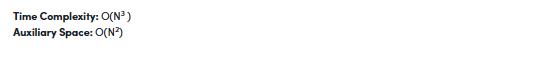

# Palindrome Partitioning

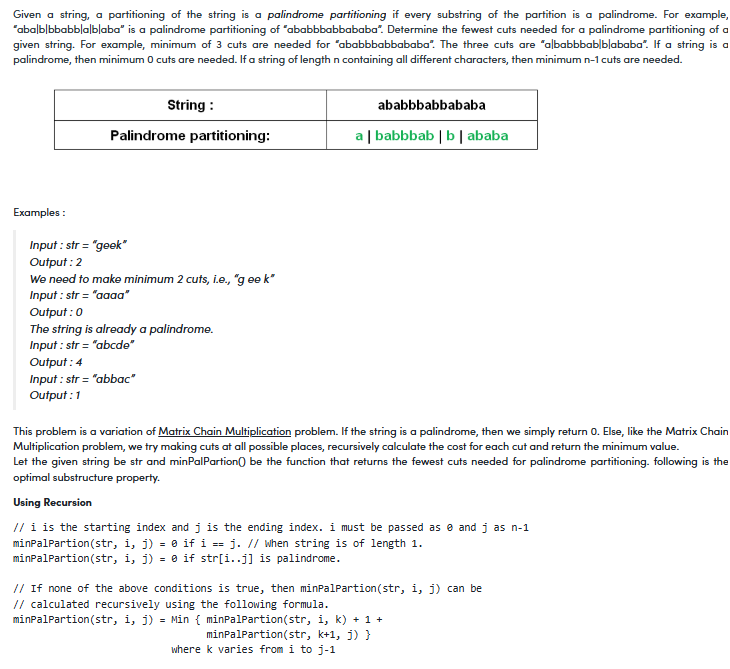

In [42]:
# Python code for implementation of Naive Recursive
# approach
def isPalindrome(x):
	return x == x[::-1]


def minPalPartion(string, i, j):
	if i >= j or isPalindrome(string[i:j + 1]):
		return 0
	ans = float('inf')
	for k in range(i, j):
		count = (
			1 + minPalPartion(string, i, k)
			+ minPalPartion(string, k + 1, j)
		)
		ans = min(ans, count)
	return ans


def main():
	string = "ababbbabbababa"
	print(
	"Min cuts needed for Palindrome Partitioning is ",
	minPalPartion(string, 0, len(string) - 1),
	)

if __name__ == "__main__":
	main()

Min cuts needed for Palindrome Partitioning is  3


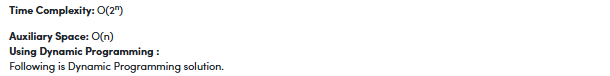

In [43]:
def isPal(s):
    return s == s[::-1]


def palPart(s):
    n = len(s)
    dp = [[0 for i in range(n)] for x in range(n)]


    for gap in range(1,n):
        for i in range(n-gap):
            j = i+gap
            if(isPal(s[i:j + 1])):
                dp[i][j]=0
            else:
                dp[i][j] = float('inf')
                for k in range (i,j):
                    dp[i][j] = min(dp[i][j],1+dp[i][k]+dp[k+1][j])





    return dp[0][n-1]


s = "geek"
print(palPart(s))

2


# Allocate minimum number of pages

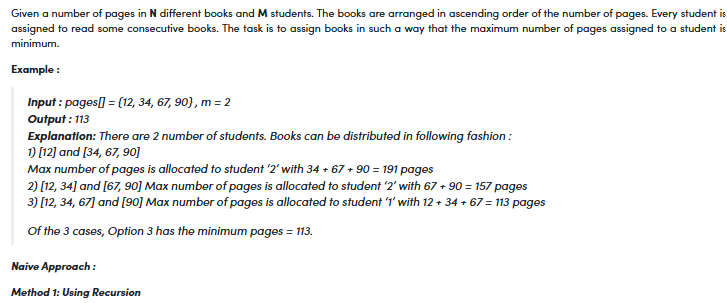

In [46]:
def minPages(arr,n,k):

    if k==1:
        return sum(arr[0:n])

    if n==1:
        return arr[0]

    res = float('inf')

    for i in range(1,n):
        res = min(res,max(minPages(arr,i,k-1),sum(arr[i:n])))

    return res



arr = [10,20,30]
n = 3
k = 2

print(minPages(arr,n,k))

30


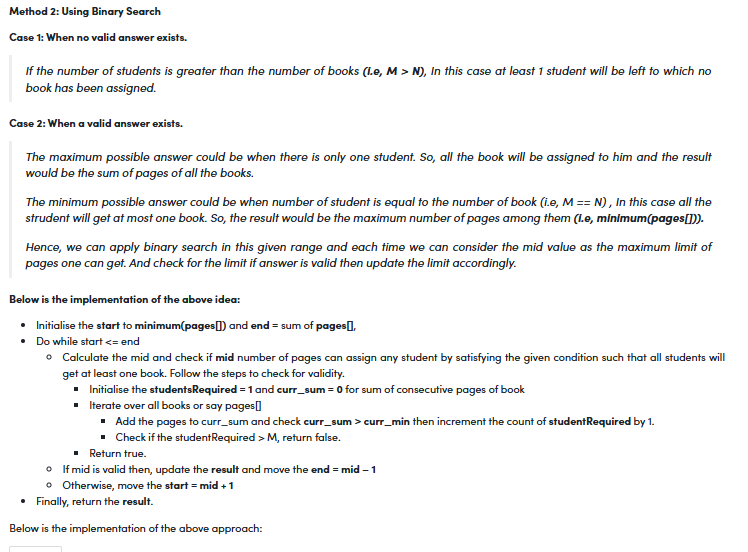

In [47]:
# Python3 program for optimal allocation of pages

# Utility function to check if
# current minimum value is feasible or not.


def isPossible(arr, n, m, curr_min):
	studentsRequired = 1
	curr_sum = 0

	# iterate over all books
	for i in range(n):

		# check if current number of pages are
		# greater than curr_min that means
		# we will get the result after
		# mid no. of pages
		if (arr[i] > curr_min):
			return False

		# count how many students are required
		# to distribute curr_min pages
		if (curr_sum + arr[i] > curr_min):

			# increment student count
			studentsRequired += 1

			# update curr_sum
			curr_sum = arr[i]

			# if students required becomes greater
			# than given no. of students, return False
			if (studentsRequired > m):
				return False

		# else update curr_sum
		else:
			curr_sum += arr[i]

	return True

# function to find minimum pages


def findPages(arr, n, m):

	sum = 0

	# return -1 if no. of books is
	# less than no. of students
	if (n < m):
		return -1

	# Count total number of pages
	for i in range(n):
		sum += arr[i]

	# initialize start as 0 pages and
	# end as total pages
	start, end = 0, sum
	result = 10**9

	# traverse until start <= end
	while (start <= end):

		# check if it is possible to distribute
		# books by using mid as current minimum
		mid = (start + end) // 2
		if (isPossible(arr, n, m, mid)):

			# update result to current distribution
			# as it's the best we have found till now.
			result = mid

			# as we are finding minimum and books
			# are sorted so reduce end = mid -1
			# that means
			end = mid - 1

		else:
			# if not possible means pages should be
			# increased so update start = mid + 1
			start = mid + 1

	# at-last return minimum no. of pages
	return result

# Driver Code


# Number of pages in books
arr = [12, 34, 67, 90]
n = len(arr)
m = 2 # No. of students

print("Minimum number of pages = ",
	findPages(arr, n, m))

Minimum number of pages =  113


Time Complexity: O(logN), Where N is the total number of pages in the book.


Auxiliary Space: O(1)